In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test_BdBKkAj.csv
train_aWnotuB.csv



In [9]:
import matplotlib.pyplot as plt

In [10]:
df_train = pd.read_csv('../input/train_aWnotuB.csv',parse_dates=[0],infer_datetime_format=True)
df_test = pd.read_csv('../input/test_BdBKkAj.csv',parse_dates=[0],infer_datetime_format=True)

In [11]:
print("Size of training set: "+ str(df_train.shape))
print("Size of test set: "+ str(df_test.shape))
print('\n')
print('columns in train: '+str(df_train.columns.tolist()))
print('columns in test: '+str(df_test.columns.tolist()))

df_train.head()

Size of training set: (48120, 4)
Size of test set: (11808, 3)


columns in train: ['DateTime', 'Junction', 'Vehicles', 'ID']
columns in test: ['DateTime', 'Junction', 'ID']


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


# Quick EDA

In [12]:
df_tmp = df_train.set_index(['Junction','DateTime'])

In [13]:
level_values = df_tmp.index.get_level_values

In [14]:
time_targets = df_tmp.groupby([level_values(0)] + [pd.Grouper(freq='1M', level=-1)])['Vehicles'].sum()
time_targets

Junction  DateTime  
1         2015-11-30    14736
          2015-12-31    15487
          2016-01-31    17940
          2016-02-29    20813
          2016-03-31    22215
          2016-04-30    22241
          2016-05-31    25900
          2016-06-30    26461
          2016-07-31    29111
          2016-08-31    31185
          2016-09-30    34374
          2016-10-31    37224
          2016-11-30    38222
          2016-12-31    39412
          2017-01-31    43439
          2017-02-28    42116
          2017-03-31    47111
          2017-04-30    45245
          2017-05-31    51327
          2017-06-30    52853
2         2015-11-30     6014
          2015-12-31     6212
          2016-01-31     5995
          2016-02-29     7153
          2016-03-31     7773
          2016-04-30     8088
          2016-05-31     8783
          2016-06-30     8568
          2016-07-31     8582
          2016-08-31     8237
                        ...  
          2017-03-31    16158
          2017-04-3

In [15]:
del df_tmp
del time_targets

## lag_features

In [16]:
train = df_train.pivot(index='DateTime', columns='Junction', values='Vehicles')
train

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
2015-11-01 05:00:00,6.0,2.0,2.0,NaN
2015-11-01 06:00:00,9.0,4.0,3.0,NaN
2015-11-01 07:00:00,8.0,4.0,4.0,NaN
2015-11-01 08:00:00,11.0,3.0,3.0,NaN


In [17]:
train.isnull().sum()

Junction
1        0
2        0
3        0
4    10248
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14592 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 4 columns):
1    14592 non-null float64
2    14592 non-null float64
3    14592 non-null float64
4    4344 non-null float64
dtypes: float64(4)
memory usage: 570.0 KB


In [19]:
value=round(train[4].max())/1.0
value

36.0

In [20]:
train = train.fillna(value)

## Generate lag features

In [21]:
def gen_lag_features(df, n_in=1,n_out=1,dropnan=True):
    n_vars = df.shape[1]
    cols, names = list(), list()
    #input sequence (t-n,.....t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names+=[('Junction %d (H-%d)' %(j+1, i)) for j in range(n_vars)]
    # forecast sequence (t,t+1,.....t+n)
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names+=[('Junction %d (H)' %(j+1)) for j in range(n_vars)]
        else:
            names+=[('Junction %d (H+%d)' %(j+1,i)) for j in range(n_vars)]
    #put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [22]:
Xy_train= gen_lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,36.0,13.0,6.0,7.0,36.0
2015-11-01 02:00:00,13.0,6.0,7.0,36.0,10.0,5.0,5.0,36.0
2015-11-01 03:00:00,10.0,5.0,5.0,36.0,7.0,6.0,1.0,36.0
2015-11-01 04:00:00,7.0,6.0,1.0,36.0,9.0,7.0,2.0,36.0
2015-11-01 05:00:00,9.0,7.0,2.0,36.0,6.0,2.0,2.0,36.0
2015-11-01 06:00:00,6.0,2.0,2.0,36.0,9.0,4.0,3.0,36.0
2015-11-01 07:00:00,9.0,4.0,3.0,36.0,8.0,4.0,4.0,36.0
2015-11-01 08:00:00,8.0,4.0,4.0,36.0,11.0,3.0,3.0,36.0
2015-11-01 09:00:00,11.0,3.0,3.0,36.0,12.0,3.0,6.0,36.0


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
Xy_train[Xy_train.columns]= scaler.fit_transform(Xy_train[Xy_train.columns])

Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,1.000000,0.052980,0.106383,0.033520,1.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,1.000000,0.033113,0.085106,0.022346,1.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,1.000000,0.013245,0.106383,0.000000,1.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,1.000000,0.026490,0.127660,0.005587,1.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,1.000000,0.006623,0.021277,0.005587,1.000000
2015-11-01 06:00:00,0.006623,0.021277,0.005587,1.000000,0.026490,0.063830,0.011173,1.000000
2015-11-01 07:00:00,0.026490,0.063830,0.011173,1.000000,0.019868,0.063830,0.016760,1.000000
2015-11-01 08:00:00,0.019868,0.063830,0.016760,1.000000,0.039735,0.042553,0.011173,1.000000
2015-11-01 09:00:00,0.039735,0.042553,0.011173,1.000000,0.046358,0.042553,0.027933,1.000000


# Split train and valid (and normalize for real)

In [24]:
X_train = Xy_train[Xy_train.index < '2017-04-01'].iloc[:,0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,1.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,1.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,1.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,1.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,1.000000
2015-11-01 06:00:00,0.006623,0.021277,0.005587,1.000000
2015-11-01 07:00:00,0.026490,0.063830,0.011173,1.000000
2015-11-01 08:00:00,0.019868,0.063830,0.016760,1.000000
2015-11-01 09:00:00,0.039735,0.042553,0.011173,1.000000


In [25]:
y_train= Xy_train[Xy_train.index < '2017-04-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,1.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,1.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,1.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,1.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,1.000000
2015-11-01 06:00:00,0.026490,0.063830,0.011173,1.000000
2015-11-01 07:00:00,0.019868,0.063830,0.016760,1.000000
2015-11-01 08:00:00,0.039735,0.042553,0.011173,1.000000
2015-11-01 09:00:00,0.046358,0.042553,0.027933,1.000000


# Reshape the Data

In [26]:
print(X_train.shape, y_train.shape)

(12407, 4) (12407, 4)


In [27]:
X_train = np.expand_dims(X_train.values,axis=2)
print(X_train.shape)

y_train= y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


In [28]:
import pandas as pd
import numpy as np
trdf = pd.read_csv('../input/train_aWnotuB.csv')
trainMat= trdf.as_matrix()
tedf = pd.read_csv('../input/test_BdBKkAj.csv')
testMat=tedf.as_matrix()
train=[]
target=[]
print(trainMat)
for i in trainMat:
    s=i[3]
    year=s/(10**7)
    s=s%(10**7)
    month=s/(10**5)
    s=s%(10**5)
    date=s/(10**3)
    s=s%(10**3)
    time=s/(10)
    s=s%(10)
    junction =s
    train.append([year,month,date,time,junction])
    target.append(i[2])
X= np.array(train)
y=np.array(target)

[['2015-11-01 00:00:00' 1 15 20151101001]
 ['2015-11-01 01:00:00' 1 13 20151101011]
 ['2015-11-01 02:00:00' 1 10 20151101021]
 ..., 
 ['2017-06-30 21:00:00' 4 16 20170630214]
 ['2017-06-30 22:00:00' 4 22 20170630224]
 ['2017-06-30 23:00:00' 4 12 20170630234]]


In [29]:
jun1=[]
jun2=[]
jun3=[]
jun4=[]
jun5=[]
jun=[jun1,jun2,jun3,jun4,jun5]
for i in range(0,len(train),24):
    ct=0
    for j in range(24):
        ct+=target[i+j]
    jun[train[i][4]-1].append(ct)
jun[3]=[0]*(len(jun[0])-len(jun[3]))+jun[3]
print(len(jun[0]),len(jun[1]),len(jun[2]),len(jun[3]))

k=7
week=[[] for i in range(k)]
for i in range(len(jun[1])):
    week[i%k].append(jun[1][i])
for i in range(k):
    print(np.mean(week[i]))
hour=[[] for i in range(24)]
for i in range(len(jun[0])*24+len(jun[1])*24, len(jun[0])*24+len(jun[1])*24+len(jun[2])*24):
    hour[i%24].append(target[i])
for i in range(24):
    print(np.mean(hour[i]))

temp=[-i for i in jun[3]]
jun[4]=np.add(jun[2],temp)

608 608 608 608
243.459770115
365.494252874
397.367816092
394.0
384.632183908
358.620689655
249.906976744
14.1743421053
9.85690789474
8.05592105263
6.77631578947
5.97861842105
5.68585526316
6.23684210526
7.55098684211
9.05756578947
11.4292763158
15.0049342105
17.1875
17.7072368421
16.0493421053
17.5723684211
17.3717105263
16.8815789474
16.9013157895
17.9292763158
19.1299342105
20.2006578947
18.7220394737
17.3947368421
15.8009868421


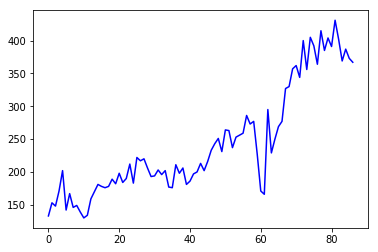

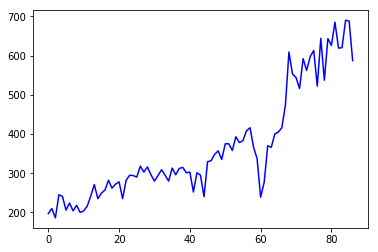

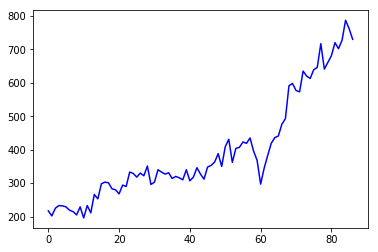

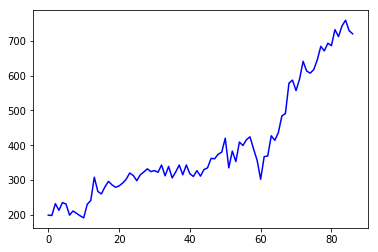

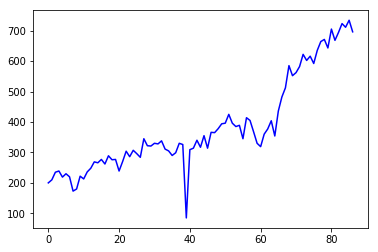

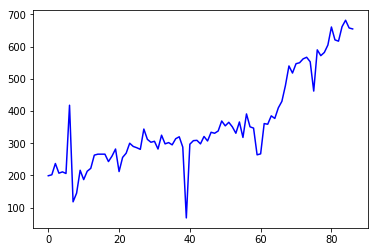

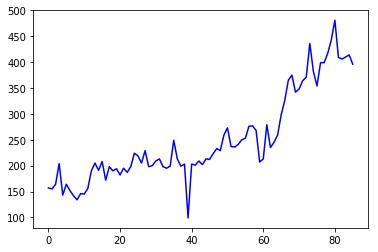

In [30]:
import matplotlib.pyplot as plt
for i in range(len(week)):
    plt.plot(week[i],'blue')
    plt.show()

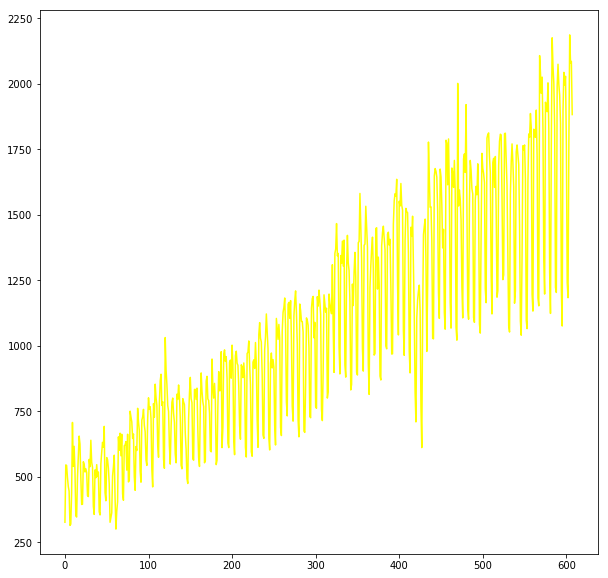

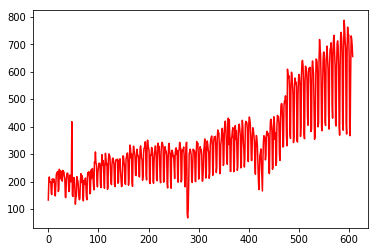

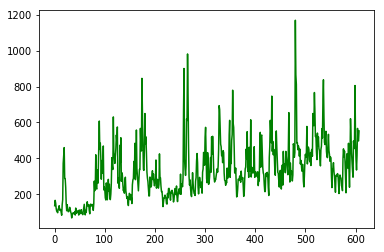

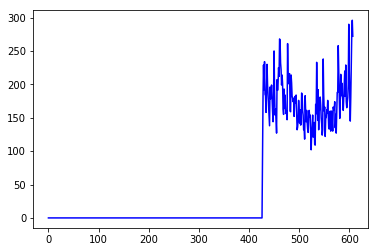

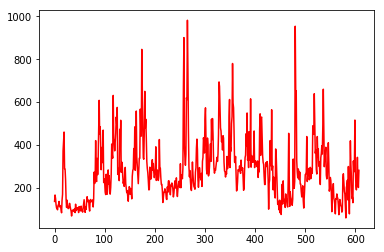

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(jun[0],'yellow')
plt.show()
plt.plot(jun[1],'red')
plt.show()
plt.plot(jun[2],'green')
plt.show()
plt.plot(jun[3],'blue')
plt.show()
plt.plot(jun[4],'red')
plt.show()

## Random Forest Classifier 

In [32]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=7)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion='entropy',min_samples_split=100,min_samples_leaf=10,max_depth=12)
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [33]:
clf.fit(X,y)
pred = clf.predict(X)
val1=(accuracy_score(y,pred)*100)
print("Accuracy Score for Random Forest :",val1*5)

Accuracy Score for Random Forest : 93.1525353283


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse1(y_true,y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [35]:
rmse1(y,pred)

8.317487011783589

# Decision Tree Classifier


In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X,y)
pred2 = DT.predict(X)
val2= (accuracy_score(y,pred2)*100)
print("Accuracy score for Decision tree classifer : ",val2*5)

Accuracy score for Decision tree classifer :  500.0


# Support Vector Machine

In [40]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X,y)
pred3 = SVM.predict(X)
val3= (accuracy_score(y,pred3)*100)
print("Accuracy score for SVM : ",val3*5)

Accuracy score for SVM :  41.3133832086


# XGBoosting

In [41]:
from xgboost import XGBClassifier
XGboost = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror",n_estimators=20,max_depth=10,random_state=42)
XGboost.fit(X,y)
pred4=XGboost.predict(X)
val4=(accuracy_score(y,pred4)*100)
print("Accuracy score for XGBoosting : ",val4*5)

Accuracy score for XGBoosting :  159.839983375


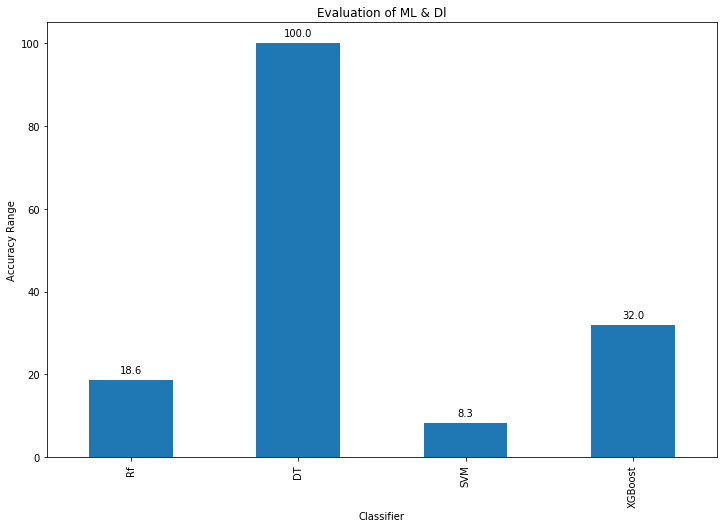

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Bring some raw data
frequencies =[val1,val2,val3,val4]
freq_series = pd.Series.from_array(frequencies)

x_labels = ['Rf','DT','SVM','XGBoost']

#plot the figure
plt.figure(figsize=(12,8))
ax= freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & Dl')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)

def add_value_labels(ax,spacing=5):
    #for each bar: Place a label
    for rect in ax.patches:
        y_value= rect.get_height()
        x_value= rect.get_x() + rect.get_width()/2
        space=spacing
        va='bottom'
        if y_value<0:     
            space*=-1
            va='top'
        label ="{:.1f}".format(y_value)
    
    #create annotation
        ax.annotate(label,
                    (x_value,y_value),
                   xytext=(0,space),
                   textcoords="offset points",
                   ha='center',
                   va=va)
# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()